In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('KYRC24_ACCT_Profile (1).csv')
print(df.shape)
print(df.columns)


(1779, 61)
Index(['School Year', 'County Number', 'County Name', 'District Number',
       'District Name', 'School Number', 'School Name', 'School Code',
       'State School Id', 'NCES Id', 'Co-Op', 'Co-Op Code', 'School Type',
       'Level', 'Federal Classification', 'READING_MATH STATUS',
       'READING_MATH STATUS RATING',
       'SCIENCE_SOCIAL STUDIES_COMBINED WRITING STATUS',
       'SCIENCE_SOCIAL STUDIES_COMBINED WRITING STATUS RATING',
       'GRADUATION STATUS', 'GRADUATION STATUS RATING',
       'Reason for Federal Classification', 'Feeder School',
       'OVERALL INDICATOR RATING', 'ENGLISH LEARNERS PROGRESS STATUS',
       'ENGLISH LEARNERS PROGRESS STATUS RATING',
       'QUALITY OF SCHOOL CLIMATE AND SAFETY STATUS',
       'QUALITY OF SCHOOL CLIMATE AND SAFETY STATUS RATING',
       'POSTSECONDARY STATUS', 'POSTSECONDARY STATUS RATING',
       'READING_MATH CHANGE DIFFERENCE', 'READING_MATH CHANGE RATING',
       'READING_MATH CHANGE',
       'SCIENCE_SOCIAL STUDIES_

In [3]:
def filter_school_level(df:pd.DataFrame, level:str)-> pd.DataFrame:
    return df[df['Level'] == level]

 

In [4]:
df_lower = df.columns.str.lower()
print(df_lower)

Index(['school year', 'county number', 'county name', 'district number',
       'district name', 'school number', 'school name', 'school code',
       'state school id', 'nces id', 'co-op', 'co-op code', 'school type',
       'level', 'federal classification', 'reading_math status',
       'reading_math status rating',
       'science_social studies_combined writing status',
       'science_social studies_combined writing status rating',
       'graduation status', 'graduation status rating',
       'reason for federal classification', 'feeder school',
       'overall indicator rating', 'english learners progress status',
       'english learners progress status rating',
       'quality of school climate and safety status',
       'quality of school climate and safety status rating',
       'postsecondary status', 'postsecondary status rating',
       'reading_math change difference', 'reading_math change rating',
       'reading_math change',
       'science_social studies_combined wr

In [5]:
df_column_names = df_lower.str.replace('_', ' ')
print(df_column_names)

Index(['school year', 'county number', 'county name', 'district number',
       'district name', 'school number', 'school name', 'school code',
       'state school id', 'nces id', 'co-op', 'co-op code', 'school type',
       'level', 'federal classification', 'reading math status',
       'reading math status rating',
       'science social studies combined writing status',
       'science social studies combined writing status rating',
       'graduation status', 'graduation status rating',
       'reason for federal classification', 'feeder school',
       'overall indicator rating', 'english learners progress status',
       'english learners progress status rating',
       'quality of school climate and safety status',
       'quality of school climate and safety status rating',
       'postsecondary status', 'postsecondary status rating',
       'reading math change difference', 'reading math change rating',
       'reading math change',
       'science social studies combined wr

In [6]:
df.columns = df_column_names
print(df.columns)

Index(['school year', 'county number', 'county name', 'district number',
       'district name', 'school number', 'school name', 'school code',
       'state school id', 'nces id', 'co-op', 'co-op code', 'school type',
       'level', 'federal classification', 'reading math status',
       'reading math status rating',
       'science social studies combined writing status',
       'science social studies combined writing status rating',
       'graduation status', 'graduation status rating',
       'reason for federal classification', 'feeder school',
       'overall indicator rating', 'english learners progress status',
       'english learners progress status rating',
       'quality of school climate and safety status',
       'quality of school climate and safety status rating',
       'postsecondary status', 'postsecondary status rating',
       'reading math change difference', 'reading math change rating',
       'reading math change',
       'science social studies combined wr

In [7]:
df_selected_columns = df[['state school id', 'level', 'reading math status', 'reading math status rating', 'science social studies combined writing status rating', 'graduation status', 'postsecondary status', 'quality of school climate and safety combined indicator rating', 'overall combined indicator rate']]
print(df_selected_columns)

      state school id              level  reading math status  \
0           1001010.0        High School                 59.7   
1           1001014.0      Middle School                 61.5   
2           1001016.0  Elementary School                 62.9   
3           1001020.0  Elementary School                 62.9   
4                 NaN  Elementary School                 62.9   
...               ...                ...                  ...   
1774              NaN        High School                 71.4   
1775              NaN      Middle School                 68.0   
1776              NaN  Elementary School                 63.2   
1777              NaN        High School                 57.1   
1778              NaN      Middle School                 59.3   

      reading math status rating  \
0                              3   
1                              3   
2                              3   
3                              3   
4                              3   
...

In [8]:
df_Level = df_selected_columns[df_selected_columns['level'] =='High School']
print(df_Level)

      state school id        level  reading math status  \
0           1001010.0  High School                 59.7   
5                 NaN  High School                 59.7   
9           2005020.0  High School                 50.4   
12                NaN  High School                 48.5   
14          3011020.0  High School                 64.4   
...               ...          ...                  ...   
1763      119595320.0  High School                 58.8   
1765              NaN  High School                 58.5   
1769      120601084.0  High School                 72.4   
1774              NaN  High School                 71.4   
1777              NaN  High School                 57.1   

      reading math status rating  \
0                              3   
5                              3   
9                              2   
12                             2   
14                             3   
...                          ...   
1763                           3   
176

In [9]:
school_profile = df_Level.dropna(subset =['state school id'], how='any')
print(school_profile)

      state school id        level  reading math status  \
0           1001010.0  High School                 59.7   
9           2005020.0  High School                 50.4   
14          3011020.0  High School                 64.4   
23          4015010.0  High School                 74.8   
30          5021027.0  High School                 60.6   
...               ...          ...                  ...   
1735      118133040.0  High School                 79.6   
1748      118591430.0  High School                 69.5   
1754      118592012.0  High School                 62.9   
1763      119595320.0  High School                 58.8   
1769      120601084.0  High School                 72.4   

      reading math status rating  \
0                              3   
9                              2   
14                             3   
23                             4   
30                             3   
...                          ...   
1735                           5   
174

In [10]:
df_behavior = pd.read_csv('KYRC24_SAFE_Behavior_Events_by_Grade_Level.csv')
print(df_behavior.shape)

(31654, 30)


In [11]:
df_behavior_lower = df_behavior.columns.str.lower()
print(df_behavior_lower)

Index(['school year', 'county number', 'county name', 'district number',
       'district name', 'school number', 'school name', 'school code',
       'state school id', 'nces id', 'co-op', 'co-op code', 'school type',
       'demographic', 'all grades', 'preschool', 'k', 'grade 1', 'grade 2',
       'grade 3', 'grade 4', 'grade 5', 'grade 6', 'grade 7', 'grade 8',
       'grade 9', 'grade 10', 'grade 11', 'grade 12', 'grade 14'],
      dtype='object')


In [12]:
df_behavior.columns = df_behavior_lower
print(df_behavior.columns)

Index(['school year', 'county number', 'county name', 'district number',
       'district name', 'school number', 'school name', 'school code',
       'state school id', 'nces id', 'co-op', 'co-op code', 'school type',
       'demographic', 'all grades', 'preschool', 'k', 'grade 1', 'grade 2',
       'grade 3', 'grade 4', 'grade 5', 'grade 6', 'grade 7', 'grade 8',
       'grade 9', 'grade 10', 'grade 11', 'grade 12', 'grade 14'],
      dtype='object')


In [13]:
df_behavior_columns = df_behavior[['state school id', 'school name', 'demographic', 'grade 9', 'grade 10', 'grade 11', 'grade 12']]
print(df_behavior_columns)

       state school id                  school name          demographic  \
0                  NaN                  All Schools         All Students   
1                  NaN                  All Schools         Total Events   
2                  NaN                  All Schools               Female   
3                  NaN                  All Schools                 Male   
4                  NaN                  All Schools     African American   
...                ...                          ...                  ...   
31649       37880101.0  Bluegrass Challenge Academy          Foster Care   
31650       37880101.0  Bluegrass Challenge Academy  Gifted and Talented   
31651       37880101.0  Bluegrass Challenge Academy             Homeless   
31652       37880101.0  Bluegrass Challenge Academy              Migrant   
31653       37880101.0  Bluegrass Challenge Academy   Military Dependent   

      grade 9 grade 10 grade 11 grade 12  
0      14,801   12,030    8,919    5,467  
1

In [14]:
df_behavior_demographic = df_behavior_columns[df_behavior_columns['demographic'] =='All Students']
print(df_behavior_demographic)

       state school id                    school name   demographic grade 9  \
0                  NaN                    All Schools  All Students  14,801   
19                 NaN                    All Schools  All Students      58   
38           1001010.0       Adair County High School  All Students      58   
57           1001012.0         Adair Learning Academy  All Students       0   
76           1001014.0     Adair County Middle School  All Students     NaN   
...                ...                            ...           ...     ...   
31559       37777158.0     Southeast Kentucky Academy  All Students       0   
31578       37777159.0                  iLEAD Academy  All Students       0   
31597              NaN                    All Schools  All Students       0   
31616       37880100.0  Appalachian Challenge Academy  All Students       0   
31635       37880101.0    Bluegrass Challenge Academy  All Students       0   

      grade 10 grade 11 grade 12  
0       12,030  

In [15]:
school_behavior = df_behavior_demographic.dropna(subset =['state school id'], how='any')
print(school_behavior)

       state school id                     school name   demographic grade 9  \
38           1001010.0        Adair County High School  All Students      58   
57           1001012.0          Adair Learning Academy  All Students       0   
76           1001014.0      Adair County Middle School  All Students     NaN   
95           1001016.0  Adair County Elementary School  All Students     NaN   
114          1001020.0     Adair County Primary Center  All Students     NaN   
...                ...                             ...           ...     ...   
31540       37777156.0                   Delta Academy  All Students       0   
31559       37777158.0      Southeast Kentucky Academy  All Students       0   
31578       37777159.0                   iLEAD Academy  All Students       0   
31616       37880100.0   Appalachian Challenge Academy  All Students       0   
31635       37880101.0     Bluegrass Challenge Academy  All Students       0   

      grade 10 grade 11 grade 12  
38  

In [16]:
conn = sqlite3.connect('school_data.db')

In [17]:
school_profile.to_sql('school_profile', conn, if_exists='replace', index=False)
school_behavior.to_sql('school_behavior', conn, if_exists='replace', index=False)

1488

In [18]:
query = """select * 
from school_profile as p
left join school_behavior as b
on p."state school id" = b."state school id"
where b."state school id" is NULL;"""

In [19]:
pd.read_sql_query(query, conn)  

,state school id,level,reading math status,reading math status rating,science social studies combined writing status rating,graduation status,postsecondary status,quality of school climate and safety combined indicator rating,overall combined indicator rate,state school id,school name,demographic,grade 9,grade 10,grade 11,grade 12


In [20]:
joined_tables = """select b."school name", p.*, b."grade 9", b."grade 10", b."grade 11", b."grade 12"
from school_profile as p
left join school_behavior as b
on p."state school id" = b."state school id";"""


In [21]:
table = pd.read_sql_query(joined_tables, conn) 
print(table) 

                              school name  state school id        level  \
0                Adair County High School        1001010.0  High School   
1    Allen County-Scottsville High School        2005020.0  High School   
2             Anderson County High School        3011020.0  High School   
3            Ballard Memorial High School        4015010.0  High School   
4               Barren County High School        5021027.0  High School   
..                                    ...              ...          ...   
223                    Corbin High School      118133040.0  High School   
224            Whitley County High School      118591430.0  High School   
225              Williamsburg City School      118592012.0  High School   
226              Wolfe County High School      119595320.0  High School   
227           Woodford County High School      120601084.0  High School   

     reading math status  reading math status rating  \
0                   59.7                   

In [22]:
table_dtypes = table.dtypes
print(table_dtypes)

school name                                                        object
state school id                                                   float64
level                                                              object
reading math status                                               float64
reading math status rating                                          int64
science social studies combined writing status rating             float64
graduation status                                                 float64
postsecondary status                                              float64
quality of school climate and safety combined indicator rating      int64
overall combined indicator rate                                   float64
grade 9                                                            object
grade 10                                                           object
grade 11                                                           object
grade 12                              

In [71]:
def get_school_information(table, school_name):
    school_info = table[table['school name'].str.lower() == school_name]
    result = school_info[['reading math status rating', 
    'science social studies combined writing status rating', 'graduation status', 'postsecondary status', 
    'quality of school climate and safety combined indicator rating', 'overall combined indicator rate']]
    if not school_info.empty:
        return result
    else:
        return f"No information found for {school_name}."

print(get_school_information(table, 'south oldham high school'))

     reading math status rating  \
182                           4   

     science social studies combined writing status rating  graduation status  \
182                                                5.0                   99.4   

     postsecondary status  \
182                  96.4   

     quality of school climate and safety combined indicator rating  \
182                                                  4                

     overall combined indicator rate  
182                             71.1  


In [77]:
def filter_schools_by_rating(table, rating):
    table['overall combined indicator rate'] = pd.to_numeric(
        table['overall combined indicator rate'], errors='coerce'
    )
    filtered = table[table['overall combined indicator rate'] > rating].copy()
    filtered.sort_values(by='overall combined indicator rate', ascending=False, inplace=True)
    # Return key columns for inspection
    return filtered[[
        'school name',
        'overall combined indicator rate'
    ]]
rating = 90
results = filter_schools_by_rating(table, rating)
count = len(results)
print(f"Number of schools with 'Overall Combined Indicator Rate' above {rating}: {count}")
print(results)


Number of schools with 'Overall Combined Indicator Rate' above 90: 5
                        school name  overall combined indicator rate
118          J. Graham Brown School                             97.5
10     Pineville Independent School                             91.9
39            Highlands High School                             91.8
120              duPont Manual High                             90.8
149  Livingston Central High School                             90.1


Rating | Count
[[ 1 18]
 [ 2 57]
 [ 3 82]
 [ 4 57]
 [ 5 14]]


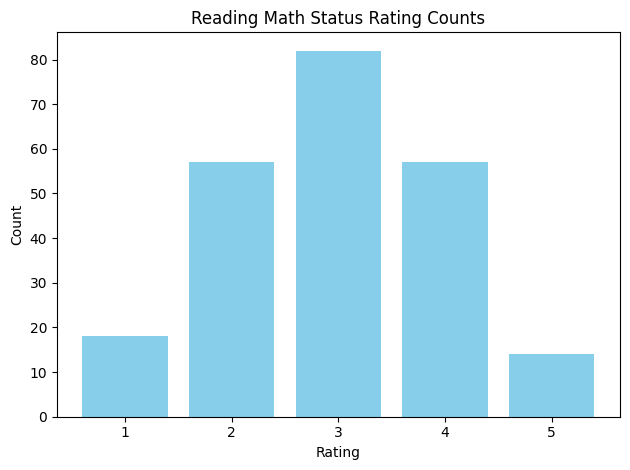

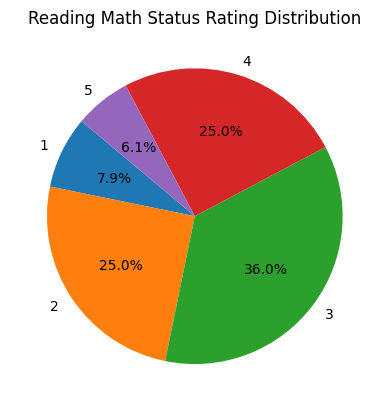

In [ ]:
reading_math_counts = np.unique(table['reading math status rating'], return_counts=True)
reading_math_counts_table = np.column_stack((reading_math_counts[0], reading_math_counts[1]))
print("Rating | Count")
print(reading_math_counts_table)

plt.bar(counts[0],counts[1], color='skyblue')
plt.title('Reading Math Status Rating Counts')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.pie(reading_math_counts[1], labels=reading_math_counts[0], autopct='%1.1f%%', startangle=140)
plt.title('Reading Math Status Rating Distribution')    
plt.show()

Rating | Count
[[ 1. 15.]
 [ 2. 64.]
 [ 3. 63.]
 [ 4. 58.]
 [ 5. 28.]]


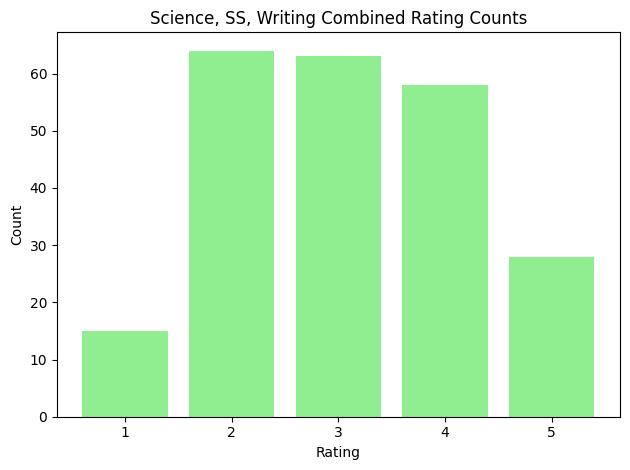

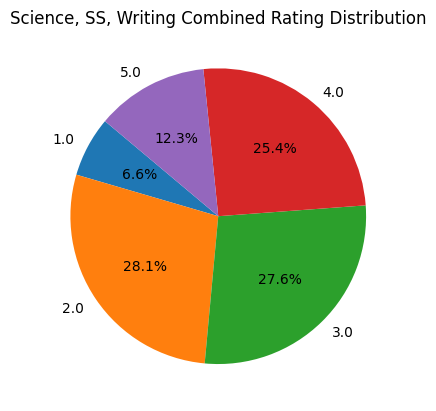

In [ ]:
science_ss_counts = np.unique(table['science social studies combined writing status rating'], return_counts=True)
science_ss_counts_table = np.column_stack((science_ss_counts[0], science_ss_counts[1]))
print("Rating | Count")
print(science_ss_counts_table)

plt.bar(science_ss_counts[0],science_ss_counts[1], color='lightgreen')
plt.title('Science, SS, Writing Combined Rating Counts')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.pie(science_ss_counts[1], labels=science_ss_counts[0], autopct='%1.1f%%', startangle=140)
plt.title('Science, SS, Writing Combined Rating Distribution')
plt.show()

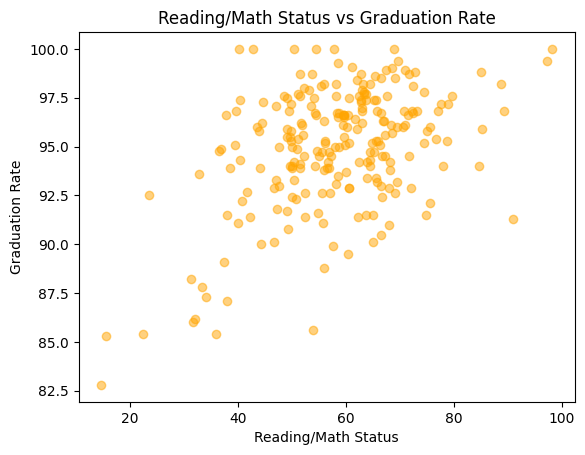

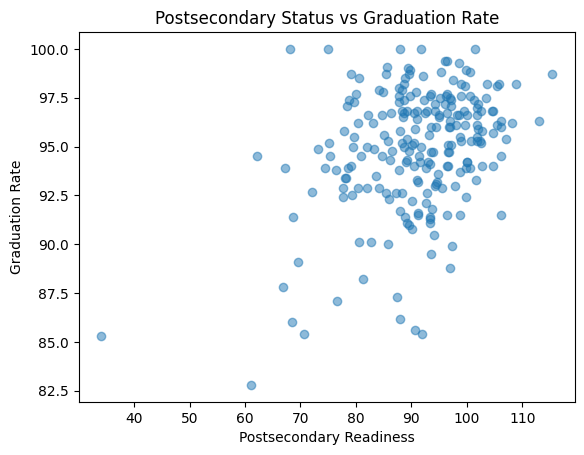

In [ ]:
plt.scatter(table['reading math status'], table['graduation status'], alpha=0.5, color='orange')
plt.title('Reading/Math Status vs Graduation Rate')
plt.xlabel('Reading/Math Status')
plt.ylabel('Graduation Rate')
plt.show()

plt.scatter(table['postsecondary status'], table['graduation status'], alpha=0.5)
plt.title('Postsecondary Status vs Graduation Rate')
plt.xlabel('Postsecondary Readiness')
plt.ylabel('Graduation Rate')
plt.show()